In [4]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from scipy.stats import stats



In [7]:
imagenes = []
for i in range(2,8):
    enlace = "Photos/mdb001 ("+str(i)+").png"
    #Se conviente la imagen a escala de grises
    #imagenes.append(Image.open(enlace).convert("L"))
    imagenes.append(cv.cvtColor(cv.imread(enlace),cv.COLOR_RGB2GRAY))

for i in range(1,10):
    enlace = "Photos/mdb00"+str(i)+".pgm"
    #Se conviente la imagen a escala de grises
    #imagenes.append(Image.open(enlace).convert("L"))
    imagenes.append(cv.cvtColor(cv.imread(enlace),cv.COLOR_RGB2GRAY))

im = imagenes[0]

print("dimensiones: ",im.shape)

dimensiones:  (227, 227)


In [8]:
#Para redimensionar la imagen
def rescaleFrame(frame, scale=1.75):
    #[1] porque se refiere al ancho de la imagen
    width = int(frame.shape[1] * scale)
    #[1] porque se refiere a la altura de la imagen
    height = int(frame.shape[0] * scale)

    dimensions = (width,height)

    return cv.resize(frame,dimensions, interpolation = cv.INTER_AREA)



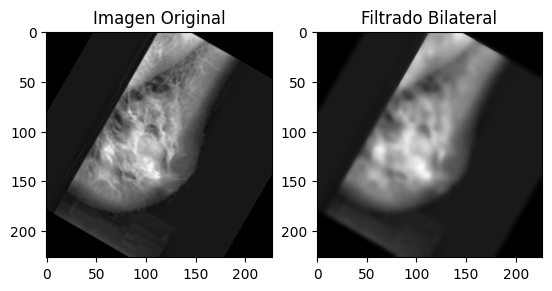

In [9]:
# Aplicar filtrado bilateral a la primera imagen
imagen = imagenes[0]
filtered_image_bilateral = cv.bilateralFilter(imagen, d=9, sigmaColor=75, sigmaSpace=75)

# Mostrar resultados
plt.subplot(1, 2, 1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1, 2, 2), plt.imshow(filtered_image_bilateral, cmap='gray'), plt.title('Filtrado Bilateral')
plt.show()

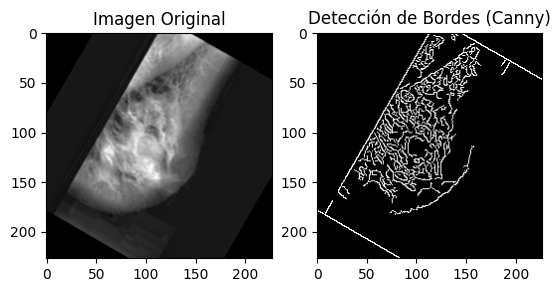

In [10]:
# Aplicar detección de bordes con Canny a la primera imagen
canny_edges = cv.Canny(imagen, 50, 150)

# Mostrar resultados
plt.subplot(1, 2, 1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1, 2, 2), plt.imshow(canny_edges, cmap='gray'), plt.title('Detección de Bordes (Canny)')
plt.show()

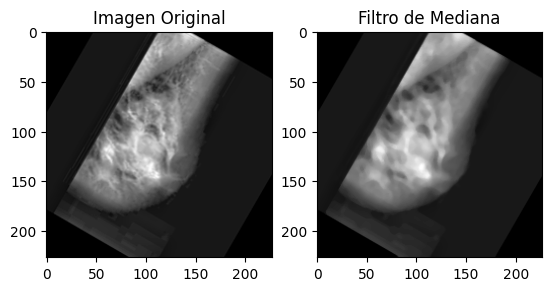

In [14]:
# Aplicar filtro de mediana a la primera imagen
median_filtered_image = cv.medianBlur(imagen, 5)

# Mostrar resultados
plt.subplot(1, 2, 1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1, 2, 2), plt.imshow(median_filtered_image, cmap='gray'), plt.title('Filtro de Mediana')
plt.show()


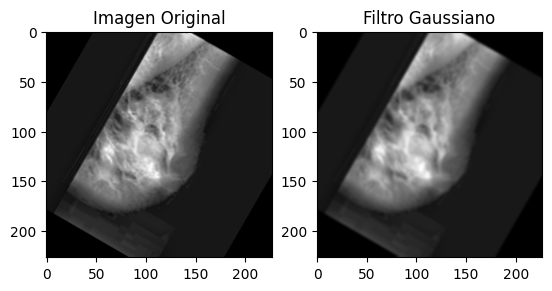

In [15]:
# Aplicar filtro gaussiano a la primera imagen
gaussian_filtered_image = cv.GaussianBlur(imagen, (5, 5), 0)

# Mostrar resultados
plt.subplot(1, 2, 1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered_image, cmap='gray'), plt.title('Filtro Gaussiano')
plt.show()


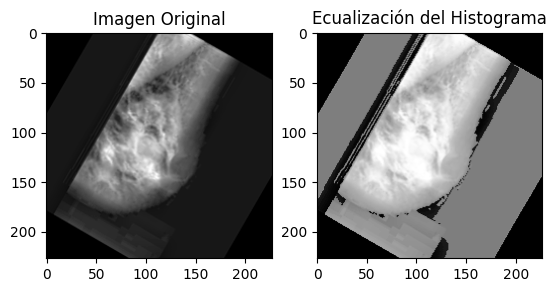

In [16]:
# Aplicar ecualización del histograma a la primera imagen
equ_histogram_image = cv.equalizeHist(imagen)

# Mostrar resultados
plt.subplot(1, 2, 1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1, 2, 2), plt.imshow(equ_histogram_image, cmap='gray'), plt.title('Ecualización del Histograma')
plt.show()


In [17]:
# Calcular la desviación estándar de la imagen original
std_dev_original = np.std(imagen)

# Calcular la desviación estándar después de aplicar un filtro de suavizado (por ejemplo, filtro gaussiano)
gaussian_filtered_image = cv.GaussianBlur(imagen, (5, 5), 0)
std_dev_filtered = np.std(gaussian_filtered_image)

print(f'Desviación estándar original: {std_dev_original}')
print(f'Desviación estándar después de filtrado: {std_dev_filtered}')


Desviación estándar original: 54.99079653670308
Desviación estándar después de filtrado: 54.46029292097738


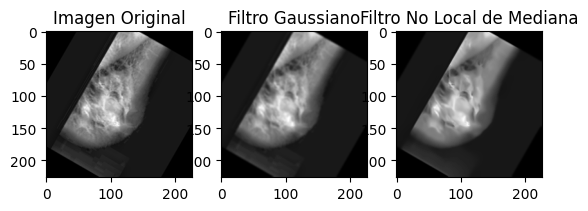

In [18]:
# Aplicar filtrado no local de mediana
nlmeans_filtered_image = cv.fastNlMeansDenoising(imagen, None, h=10, searchWindowSize=21, templateWindowSize=7)

# Mostrar resultados
plt.subplot(1, 3, 1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1, 3, 2), plt.imshow(gaussian_filtered_image, cmap='gray'), plt.title('Filtro Gaussiano')
plt.subplot(1, 3, 3), plt.imshow(nlmeans_filtered_image, cmap='gray'), plt.title('Filtro No Local de Mediana')
plt.show()
